# Analyzing results

We will use python and this jupyter notebook to plot and analyze the results obtained from the
fortran source code.

## Plotting results

For this we will use the `numpy` and `matplotlib.pyplot` packages

In [11]:
# Importing numpy and matplotlib
import numpy as np 
import matplotlib.pyplot as plt

Different styles are predefined that give different appearance to the plots. This one emulates the style of the figures you'll find on statisical analysis news site fivethirtyeight.com

In [12]:
plt.style.use('fivethirtyeight')

In [13]:
# reading data stored in results_basic.dat

file_name = 'results_basic.dat'

# loadtxt reads all the data in a file and stores them in an array (assuming it's all floats)
# we use skiprows=1 to avoid the header
all_data = np.loadtxt(file_name,skiprows=1)

# We transpose the array in order to be able to extract each column individually
all_data = all_data.transpose()
x_0 = all_data[0]
booles = all_data[1]
large_x0 = all_data[2]
monte_carlo = all_data[3]
monte_carlo_error = all_data[4]
# Each one of these is a numpy array that contains one of the columns in the results_basic.dat file.
# This will allow us to make operations on the extracted data

### Comparing Boole's quadrature and large $x_0$ approximation

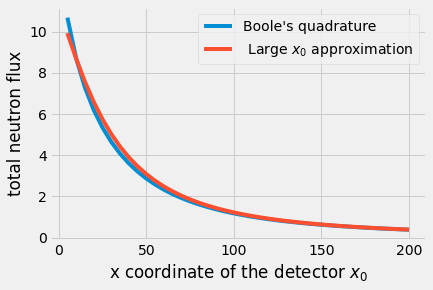

In [14]:
# The plot function can take two equally sized arrays,
# taking the first one as the x coordinates and the second one as the y coordinates
plt.plot(x_0, booles, label = "Boole's quadrature")
plt.plot(x_0, large_x0, label =' Large $x_0$ approximation')

plt.xlabel('x coordinate of the detector $x_0$')
plt.ylabel('total neutron flux')
# legend displays the labels given in each plot
plt.legend()
plt.show()

#### They are the most different when x_0 is the smallest and closest when x_0 is the biggest. They start to diverge due to the fact that as x_0 gets really big then we can approximate it with the point source approximation. 

### Comparing Boole's quadrature and Monte Carlo integration

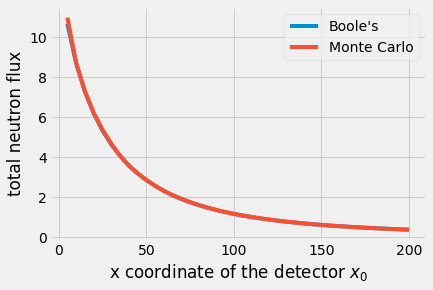

In [15]:
plt.plot(x_0, booles, label = "Boole's")
plt.plot(x_0, monte_carlo, label = 'Monte Carlo')
plt.xlabel('x coordinate of the detector $x_0$')
plt.ylabel('total neutron flux')
plt.legend()
plt.show()

In [16]:
# Operations between arrays of the same size are applied element-wise
quadrature_difference = np.absolute(booles - monte_carlo)

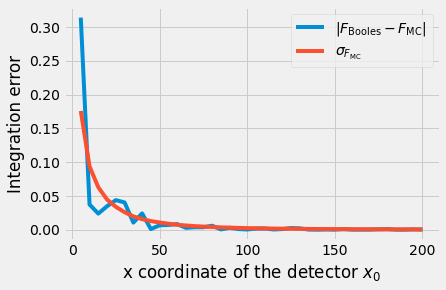

In [17]:
plt.plot(x_0, quadrature_difference, label = r'$|F_{\rm Booles} - F_{\rm MC}|$')
plt.plot(x_0, monte_carlo_error, label = r'$\sigma_{F_{\rm MC}}$')
plt.xlabel('x coordinate of the detector $x_0$')
plt.ylabel('Integration error')
plt.legend()
plt.show()

## Advanced part of the project

### Reading the data from results file

In [18]:
# reading data stored in results_advanced.dat
file_name = 'results_advanced.dat' 
all_data = np.loadtxt(file_name,skiprows=1) 
all_data = all_data.transpose()
radius = all_data[0]
box_booles = all_data[1]
hollow_booles = all_data[2]
hollow_monte_carlo = all_data[3]
monte_carlo_error = all_data[4]
# you should know how to do this by now.

### Comparing Boole's and Monte Carlo when there's a hollow sphere inside the reactor

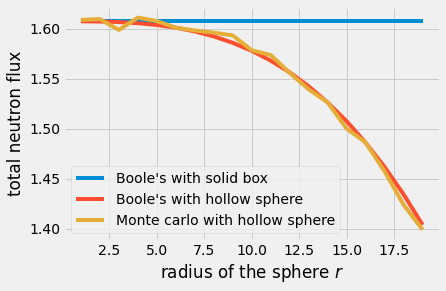

In [19]:
# plot Boole's result, Monte Carlo result and the Solid box with booles method
# as a function of the sphere's radius here
plt.plot(radius, box_booles, label = "Boole's with solid box")
plt.plot(radius, hollow_booles , label = "Boole's with hollow sphere")
plt.plot(radius, hollow_monte_carlo, label = 'Monte carlo with hollow sphere')
plt.xlabel('radius of the sphere $r$')
plt.ylabel('total neutron flux')
# legend displays the labels given in each plot
plt.legend()
plt.show()



#### The influence of the sphere's flux on the system decreases as the radius decreases and we approach the case of a solid box again. 

Finally, let's plot the difference between both methods and compare it with the error estimate 

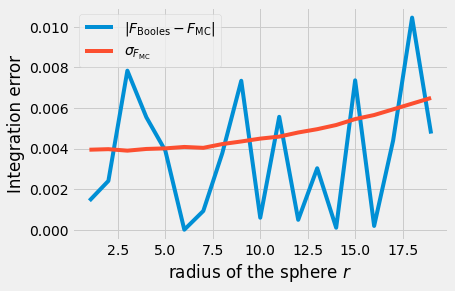

In [20]:
# you should know how to do this by now 
quadrature_difference = np.absolute(hollow_booles - hollow_monte_carlo)
plt.plot(radius, quadrature_difference, label = r'$|F_{\rm Booles} - F_{\rm MC}|$')
plt.plot(radius, monte_carlo_error, label = r'$\sigma_{F_{\rm MC}}$')
plt.xlabel('radius of the sphere $r$')
plt.ylabel('Integration error')
plt.legend()
plt.show()


#### As the sphere radius increases then the chance of a random point being inside the sphere(and being 0) is greater, however because we are using a random number generator, the results will not necessarily be linear.